# Statistiques descriptives du DataSet

## Table des matières

* [Import des modules](#import_modules)
* [Fonctions de génération de données aléatoires](#fonction_generation)
* [Statistiques du coût des routes](#stat_routes)
    * [Récupération de la matrice d'adjacence](#recup_matrice_routes)
    * [Moyenne du coût des routes](#moyenne_cout_routes)
    * [Maximum et Minimum du coût des routes](#max_min_routes)
    * [Médiane du coût des routes](#mediane_routes)
    * [Boite à moustache du coût des routes](#boite_moustache_routes)
* [Statistiques des demandes des clients](#stats_demandes_clients)
    * [Récupération des données de commandes](#recup_matrice_demandes_clients)
    * [Moyenne du volume des demandes clients](#moyenne_demandes_clients)
    * [Maximum et Minimum des demandes clients](#max_min_demandes_clients)
    * [Médiane des demandes clients](#mediane_demandes_clients)
    * [Boite à Moustache des demandes clients](#boite_moustache_demandes_clients)

## Import des modules <a class="anchor" id="import_modules"></a>

In [1]:
from statistics import mean
import matplotlib.pyplot as plt
import os
from datetime import datetime
from sklearn import linear_model
from itertools import chain
import random
import string
import numpy
import pprint
import json

## Fonctions de génération de données aléatoires <a class="anchor" id="fonction_generation"></a>

In [2]:
def create_city():
    """Générer une chaîne aléatoire de longueur fixe"""
    str = string.ascii_lowercase
    length = random.randint(2, 10)
    return ''.join(random.choice(str) for i in range(length))
   
#print ("Ville aléatoire :", create_city() )

def create_matrix(lenght = 10, low = 1, high = 10):
    matrix = numpy.random.randint(low, high, size = (lenght, lenght))
    for i in range(len(matrix)):
        matrix[i][i] = 0
    return matrix

#print(create_matrix(4, 2, 10))

def create_car(nb_camion = 5, dimension_max = 8):
    """Générer un camion avec une capacité aléatoire à trois dimensions"""
    camions = []
    
    for i in range(nb_camion):
        dimensions = [random.randint(1, dimension_max) for j in range(3)]
        camions.append(dimensions)
        
    return camions

def create_object(dimension_max = 3):
    """Générer un ensemble d'objets d'une taille aléatoire à trois dimensions"""
    
    dimensions = [random.randint(1, dimension_max) for j in range(3)]
        
    return dimensions

def create_graphe():
    matrix = create_matrix().tolist()
    graphe = {}
    
    graphe = {matrix.index(i) + 1: {"ville" : create_city(), "poids" : i, "demande" : create_object()} for i in matrix}
    pprint.pprint(graphe)
    return graphe

with open('matrix_stats.json', 'w') as f:
    json.dump(create_graphe(), f, indent=4)

{1: {'demande': [2, 3, 3],
     'poids': [0, 7, 2, 5, 4, 1, 5, 6, 3, 3],
     'ville': 'im'},
 2: {'demande': [3, 1, 1],
     'poids': [3, 0, 7, 7, 4, 1, 7, 9, 9, 4],
     'ville': 'xvhxvbnr'},
 3: {'demande': [3, 1, 3],
     'poids': [7, 7, 0, 3, 6, 9, 5, 5, 8, 5],
     'ville': 'jbd'},
 4: {'demande': [1, 1, 3],
     'poids': [3, 7, 2, 0, 8, 8, 8, 1, 2, 1],
     'ville': 'eqzjtyyexe'},
 5: {'demande': [1, 2, 1],
     'poids': [4, 5, 4, 8, 0, 2, 8, 9, 6, 9],
     'ville': 'kweynljw'},
 6: {'demande': [3, 2, 2],
     'poids': [6, 7, 8, 1, 4, 0, 4, 1, 8, 5],
     'ville': 'qjoyp'},
 7: {'demande': [2, 1, 2],
     'poids': [8, 7, 8, 3, 1, 3, 0, 5, 8, 1],
     'ville': 'okkje'},
 8: {'demande': [1, 2, 3],
     'poids': [2, 3, 3, 5, 9, 8, 7, 0, 8, 5],
     'ville': 'xdqq'},
 9: {'demande': [3, 1, 3],
     'poids': [5, 2, 8, 1, 1, 1, 7, 5, 0, 4],
     'ville': 'mtanvuh'},
 10: {'demande': [2, 1, 3],
      'poids': [4, 9, 6, 2, 3, 3, 9, 4, 5, 0],
      'ville': 'azmqakouef'}}


## Statistiques du coût des routes <a class="anchor" id="stat_routes"></a>

### Récupération de la matrice d'adjacence <a class="anchor" id="recup_matrice_routes"></a>

In [3]:
with open('matrix_stats.json') as f:
    data = json.load(f)
    
roads_weights = [data[str(i+1)]["poids"] for i in range(len(data))]
    
roads_weights = numpy.array(roads_weights)

pprint.pprint(roads_weights)

array([[0, 7, 2, 5, 4, 1, 5, 6, 3, 3],
       [3, 0, 7, 7, 4, 1, 7, 9, 9, 4],
       [7, 7, 0, 3, 6, 9, 5, 5, 8, 5],
       [3, 7, 2, 0, 8, 8, 8, 1, 2, 1],
       [4, 5, 4, 8, 0, 2, 8, 9, 6, 9],
       [6, 7, 8, 1, 4, 0, 4, 1, 8, 5],
       [8, 7, 8, 3, 1, 3, 0, 5, 8, 1],
       [2, 3, 3, 5, 9, 8, 7, 0, 8, 5],
       [5, 2, 8, 1, 1, 1, 7, 5, 0, 4],
       [4, 9, 6, 2, 3, 3, 9, 4, 5, 0]])


### Moyenne du coût des routes <a class="anchor" id="moyenne_cout_routes"></a>

In [4]:
sum_weight = [j for i in roads_weights for j in i if j != 0]
            
print("La moyenne des coûts des routes est de %s" % (numpy.array(sum_weight).mean()))

La moyenne des coûts des routes est de 5.044444444444444


### Maximum et Minimum du coût des routes <a class="anchor" id="max_min_routes"></a>

In [5]:
maximumCoutRoute = max(sum_weight)
print("La valeur maximale pour le coût des routes est : %s" % maximumCoutRoute)
minimumCoutRoute = min(sum_weight)
print("La valeur minimale pour le coût des routes est : %s" % minimumCoutRoute)
etendueCoutRoute = maximumCoutRoute - minimumCoutRoute
print("L'étendue de cette valeur est donc de %s" % etendueCoutRoute)

La valeur maximale pour le coût des routes est : 9
La valeur minimale pour le coût des routes est : 1
L'étendue de cette valeur est donc de 8


### Médiane du coût des routes <a class="anchor" id="mediane_routes"></a>

In [6]:
medianeCout = numpy.median(numpy.array(sum_weight))
print("La valeur médiane pour le coût des routes est : %s" % medianeCout)

La valeur médiane pour le coût des routes est : 5.0


### Boite à moustache du coût des routes <a class="anchor" id="boite_moustache_routes"></a>

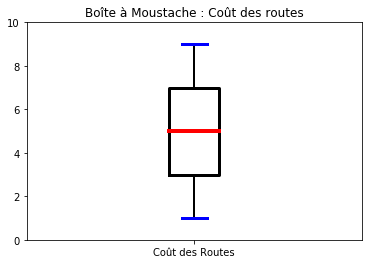

In [7]:
boxplotElements = plt.boxplot(sum_weight)
plt.title("Boîte à Moustache : Coût des routes")
plt.gca().xaxis.set_ticklabels(['Coût des Routes'])
for element in boxplotElements['medians']:
    element.set_color('red')
    element.set_linewidth(4)
for element in boxplotElements['boxes']:
    element.set_linewidth(3)
for element in boxplotElements['whiskers']:
    element.set_linewidth(2)
for element in boxplotElements['caps']:
    element.set_color('blue')
    element.set_linewidth(3)
plt.ylim(minimumCoutRoute-1, maximumCoutRoute+1)
plt.savefig('BoxPlotCout.png')
plt.show()

## Statistiques des demandes des clients <a class="anchor" id="stats_demandes_clients"></a>

### Récupération des données de commandes <a class="anchor" id="recup_matrice_demandes_clients"></a>

In [8]:
with open('matrix_stats.json') as f:
    data = json.load(f)
    
orders = [data[str(i+1)]["demande"] for i in range(len(data))]
    
orders = numpy.array(orders)

pprint.pprint(orders)

array([[2, 3, 3],
       [3, 1, 1],
       [3, 1, 3],
       [1, 1, 3],
       [1, 2, 1],
       [3, 2, 2],
       [2, 1, 2],
       [1, 2, 3],
       [3, 1, 3],
       [2, 1, 3]])


### Moyenne du volume des demandes clients <a class="anchor" id="moyenne_demandes_clients"></a>

In [9]:
sum_orders = [numpy.prod(i) for i in orders]
print(sum_orders)

print("Le volume moyen des demandes des clients est de %s" % (numpy.array(sum_orders).mean()))

[18, 3, 9, 3, 2, 12, 4, 6, 9, 6]
Le volume moyen des demandes des clients est de 7.2


### Maximum et Minimum des demandes clients <a class="anchor" id="max_min_demandes_clients"></a>

In [10]:
maximumDemande = max(sum_orders)
print("La valeur maximale pour la demande des clients est : %s" % maximumDemande)
minimumDemande = min(sum_orders)
print("La valeur minimale pour la demande des clients est : %s" % minimumDemande)
etendueDemande = maximumDemande - minimumDemande
print("L'étendue de cette valeur est donc de %s" % etendueDemande)

La valeur maximale pour la demande des clients est : 18
La valeur minimale pour la demande des clients est : 2
L'étendue de cette valeur est donc de 16


### Médiane des demandes clients <a class="anchor" id="mediane_demandes_clients"></a>

In [11]:
medianeCout = numpy.median(numpy.array(sum_orders))
print("La valeur médiane pour la demande des clients est : %s" % medianeCout)

La valeur médiane pour la demande des clients est : 6.0


### Boite à Moustache des demandes clients <a class="anchor" id="boite_moustache_demandes_clients"></a>

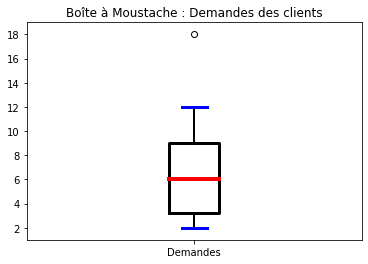

In [12]:
boxplotElements = plt.boxplot(sum_orders)
plt.title("Boîte à Moustache : Demandes des clients")
plt.gca().xaxis.set_ticklabels(['Demandes'])
for element in boxplotElements['medians']:
    element.set_color('red')
    element.set_linewidth(4)
for element in boxplotElements['boxes']:
    element.set_linewidth(3)
for element in boxplotElements['whiskers']:
    element.set_linewidth(2)
for element in boxplotElements['caps']:
    element.set_color('blue')
    element.set_linewidth(3)
plt.ylim(minimumDemande-1, maximumDemande+1)
plt.savefig('BoxPlotDemande.png')
plt.show()